$ y = \frac{1}{1 + e^{-z}} $
$ z = \omega ^ T x + b $

### 梯度下降

x_train= (900, 3)
x_test= (100, 3)
y_train= (900, 1)
y_test= (100, 1)
epoch 0 cost 0.693147
epoch 100 cost 0.547961
epoch 200 cost 0.498050
epoch 300 cost 0.473608
epoch 400 cost 0.459135
epoch 500 cost 0.449448
epoch 600 cost 0.442384
epoch 700 cost 0.436908
epoch 800 cost 0.432472
epoch 900 cost 0.428758
{'w': array([[ 1.08982785],
       [-0.09343119],
       [-0.19066844]]), 'b': np.float64(-0.5635638899262391)}
[[0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.

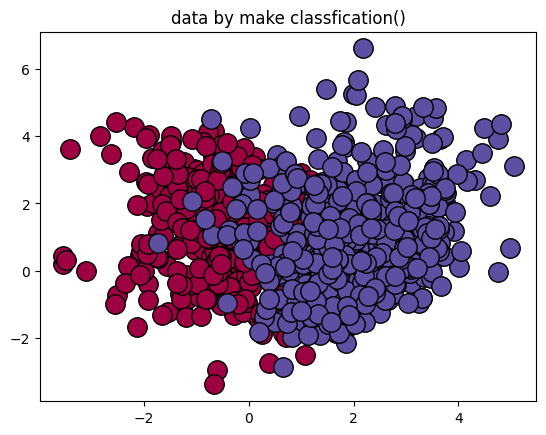

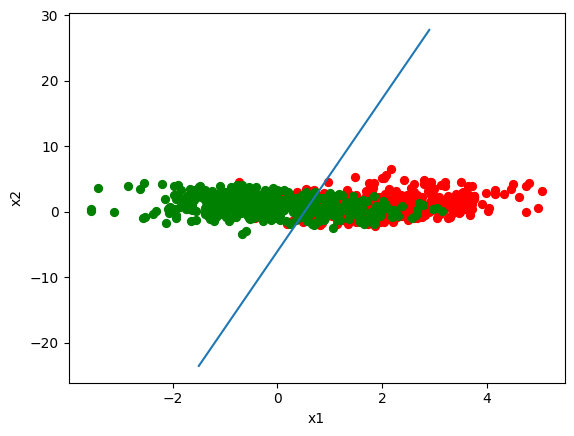

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets._samples_generator import make_classification

class logistic_regression():
    def __init__(self):
        pass

    def sigmoid(self,x):
        z = 1 / (1 + np.exp(-x))
        return z

    def initialize_param(self,dims):
        w = np.zeros((dims, 1))
        b = 0
        return w, b

    def logistic(self,x, y, w, b):
        num_train = x.shape[0]
        num_feature = x.shape[1]

        a = self.sigmoid(np.dot(x, w) + b)
        cost = -1 / num_train * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))
        dw = np.dot(x.T, (a - y)) / num_train
        db = np.sum(a - y) / num_train
        cost = np.squeeze(cost)
        return a, cost, dw, db

    #定义基于梯度下降的参数更新训练过程
    def logistic_train(self,x, y, learning_rate, epochs):
        w, b = self.initialize_param(x.shape[1])
        cost_list = []

        for i in range(epochs):
            a, cost, dw, db = self.logistic(x, y, w, b)
            w = w - learning_rate * dw
            b = b - learning_rate * db
            if i % 100 == 0:
                cost_list.append(cost)
                print('epoch %d cost %f' % (i, cost))

        params = {
            'w': w,
            'b': b
        }
  
        grads = {
            'dw': dw,
            'db': db
        }
        return cost_list, params, grads

    def predict(self,x, params):
        y_prediction = self.sigmoid(np.dot(x, params['w']) + params['b'])
        for i in range(len(y_prediction)):
            if y_prediction[i] > 0.5:
                y_prediction[i] = 1
            else:
                y_prediction[i] = 0
        return y_prediction
        
    def accuracy(self,y_test, y_pred):
        correct_count = 0
        for i in range(len(y_test)):
            for j in range(len(y_pred)):
                if y_test[i] == y_pred[j] and i == j:
                    correct_count += 1

        accuracy_score = correct_count / len(y_test)
        return accuracy_score
    
    def create_data(self):
        x, labels = make_classification(n_samples=1000, n_features=3, n_redundant=0, n_informative=2, random_state=1,
                                        n_clusters_per_class=2)
        rng = np.random.RandomState(2)
        x += 2 * rng.uniform(size=x.shape)
        unique_label = set(labels)
        colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_label)))
        for k, col in zip(unique_label, colors):
            x_k = x[labels == k]
            plt.plot(x_k[:, 0], x_k[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
        plt.title('data by make classfication()')

        offset = int(x.shape[0] * 0.9)
        x_train, y_train = x[:offset], labels[:offset]
        x_test, y_test = x[offset:], labels[offset:]
        y_train = y_train.reshape((-1, 1))
        y_test = y_test.reshape((-1, 1))
        print("x_train=", x_train.shape)
        print("x_test=", x_test.shape)
        print("y_train=", y_train.shape)
        print("y_test=", y_test.shape)
        return x_train, y_train, x_test, y_test

    def plot_logistic(self,x_train, y_train, params):
        n = x_train.shape[0]
        xcord1 = []
        ycord1 = []
        xcord2 = []
        ycord2 = []
        for i in range(n):
            if y_train[i] == 1:
                xcord1.append(x_train[i][0])
                ycord1.append(x_train[i][1])
            else:
                xcord2.append(x_train[i][0])
                ycord2.append(x_train[i][1])
        fig = plt.figure(2)
        ax = fig.add_subplot(111)
        ax.scatter(xcord1, ycord1, s=32, c='red')
        ax.scatter(xcord2, ycord2, s=32, c='green')
        x = np.arange(-1.5, 3, 0.1)
        y = (-params['b'] - params['w'][0] * x) / params['w'][1]#分界面
        ax.plot(x, y)
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.show()


if __name__=='__main__':
    model=logistic_regression()
    x_train,y_train,x_test,y_test=model.create_data()
    cost_list, params, grads = model.logistic_train(x_train, y_train, 0.01, 1000)
    print(params)
    y_prediction = model.predict(x_test, params)
    print(y_prediction)

    y_train_pred = model.predict(x_train, params)
    accuracy_score_train = model.accuracy(y_train, y_train_pred)
    print('train accuracy is:',accuracy_score_train)
    y_test_pred = model.predict(x_test, params)
    accuracy_score_test = model.accuracy(y_test, y_test_pred)
    print('test accuracy is:',accuracy_score_test)

    model.plot_logistic(x_train, y_train, params)


### sklearn库

In [14]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lgr = LogisticRegression()
lgr.fit(X_train, y_train)

y_pred = lgr.predict(X_test)
score = lgr.score(X_test, y_test)

d:\codeVS\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


converged after 1323 iterations
opt_w: [ 0.26031859  0.80769812 -1.48135735]
cost at opt_w: 0.28381840550408244
Train Accuracy: 98.667%


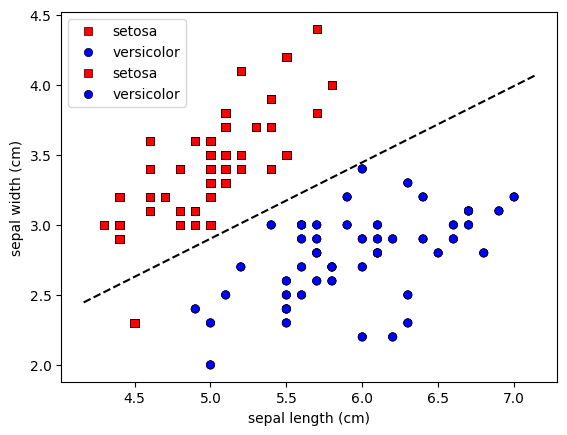

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

np.random.seed(0)

iris = load_iris()
X = iris.data[:, :2]
y = iris.target

X = X[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

def plot_data(X, y):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y], style=iris.target_names[y], palette=['r', 'b'], markers=('s', 'o'), edgecolor='k')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.legend()

plot_data(X, y)

n = X.shape[0]
X_with_bias = np.hstack((np.ones((n, 1)), X))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_with_bias, y, random_state=0)

def sigmoid(z):
    z = np.array(z)
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, w):
    p = sigmoid(X @ w)
    J = -(1 / n) * (y @ np.log(p) + (1 - y) @ np.log(1 - p))
    grad = (1 / n) * X.T @ (p - y)
    return J, grad

def optimize_model(X, y, alpha=0.01, max_iter=5000, tol=0.0001):
    w = np.random.rand(X.shape[1])
    cost, grad = cost_function(X, y, w)

    for i in range(max_iter):
        w = w - alpha * grad
        new_cost, grad = cost_function(X, y, w)
        if new_cost > cost - tol:
            print(f'converged after {i} iterations')
            return w, new_cost
        cost = new_cost

    print('Maximum number of iterations reached')
    return w, cost

opt_w, cost = optimize_model(X_train, y_train)
print('opt_w:', opt_w)
print('cost at opt_w:', cost)

# 预测概率
def predict_prob(X, w):
    p = sigmoid(X @ w)
    return p

predict_prob([[1, 6, 2]], opt_w)
predict_prob([[1, 5.5, 3]], opt_w)

# 返回预测标签
def predict(X, w):
    p = sigmoid(X @ w)
    y_pred = (p >= 0.5).astype(int)
    return y_pred

predict([[1, 6, 2]], opt_w)
predict([[1, 5.5, 3]], opt_w)

# 模型评估
def evaluate_model(X, y, w):
    y_pred = predict(X, w)
    accuracy = np.mean(y == y_pred)
    return accuracy

train_accuracy = evaluate_model(X_train, y_train, opt_w)
print(f'Train Accuracy: {train_accuracy * 100:.3f}%')

def plot_boundary(X, y, w):
    plot_data(X, y)

    line_x = np.array(plt.gca().get_xlim())
    line_y = -1 / w[2] * (w[1] * line_x + w[0])
    plt.plot(line_x, line_y, c='k', ls='--')
plot_boundary(X, y, opt_w)
